[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Concepts/Python/Multiple%20Comparisons.ipynb)

# Definitions

The multiple comparisons problem in statistics occurs when multiple statistical inferences are done simultaneously, which greatly increases the probability that any one inference will yield an erroneous result, by chance. A lot has been written about this problem, including:

- [Its prevalence in fMRI data analysis](https://www.sciencedirect.com/science/article/pii/S1053811912007057?via%3Dihub) (including a compelling illustration by this [prizewinning study](https://blogs.scientificamerican.com/scicurious-brain/ignobel-prize-in-neuroscience-the-dead-salmon-study/)\)

- [How Baysian methods can avoid the problem](http://www.stat.columbia.edu/~gelman/research/published/multiple2f.pdf).

- [General approaches for correcting for multiple comparisons](http://www.biostathandbook.com/multiplecomparisons.html).

Here we will provide some intuition for the problem using a simple thought experiment, to sensitize you to how much of a problem it can be. Consider performing the same statistical test on *N* different samples corresponding to, say, different voxels in fMRI data, using a *p*-value of $\alpha$ (typically 0.05) for each test.

Thus, for any one test, the probability of getting a Type I error (rejecting $H_0$ when $H_0$ is true) is $\alpha$:

$p_{error}=\alpha$

For two tests, the probably of getting a Type I error for either test is just one minus the combined probability of not getting a Type I error from either one:

$p_{error}=1-(1-\alpha)(1-\alpha)$

For *N* tests, the probably of getting a Type I error for either test is just one minus the combined probability of not getting a Type I error from any one:

$p_{error}=1-(1-\alpha)^N$

Run the cell below to see that the probability of getting a Type I error under these conditions grows rapidly with *N*, implying that it becomes very, very likely that you will get a "statistically significant result" just by chance if you do enough tests:

Text(0, 0.5, '$P_{error}$')

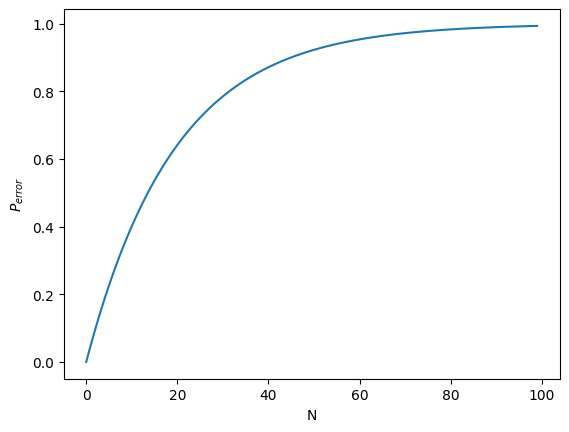

In [1]:
import matplotlib.pyplot as plt
import numpy as np

alpha = 0.05
N = np.arange(0,100)
plt.plot(N, 1-(1-alpha)**N)
plt.xlabel('N')
plt.ylabel('$P_{error}$')

# Correcting for multiple comparisons



There are a number of different methods that can be used to [correct for this problem](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5506159/). Below are two common methods.




## Bonferroni correction

The simplest way to correct for Type I errors (false positives) in multiple comparisons is to divide $\alpha$ by the number of comparisons, known as the [Bonferroni correction](https://mathworld.wolfram.com/BonferroniCorrection.html). This is a very conservative test that is typically used when the number of comparisons is relatively small and you want to avoid Type I errors.

## Benjamini–Hochberg procedure


Another approach is to more carefully control the false-discovery rate using the [Benjamini–Hochberg procedure](https://www.jstor.org/stable/2346101?seq=1#metadata_info_tab_contents):

1\. Rank the individual *p*-values in ascending order, labeled *i*=1...*n*

2\. For each *p*-value, calculate its "critical value" as (*i*/*n*)*Q*, where *i* is the rank, *n* is the total number of tests, and *Q* is the false discovery rate (a percentage) that you choose (typically 0.05).

3\. In your rank-ordered, original *p*-values, find the largest value that is smaller than its associated critical value; this *p*-value is the new criterion (i.e., reject $H_0$ for all cases for which *p* ≤ this value).

# Exercise

In this exercise we will run through an example of correcting for multiple comparisons with both the Benjamini-Hochberg procedure and the more conservative Bonferroni correction.

First, simulate multiple (say, 1000) t-tests comparing two samples with equal means and standard deviations, and save the p-values. Obviously, at p<0.05 we expect that ~5% of the simulations to yield a "statistically significant" result (of rejecting the NULL hypothesis that the samples come from distributions with equal means).

Second, once you have the simulated p-values, apply both methods to address the multiple comparisons problem.

Third, set the sample 1 and sample 2 means to be 1 and 2 respectively, and re-run the exercise. What do you notice? What if you make the difference between means even greater?

# Step 1:  simulate multiple (say, 1000) t-tests comparing two samples with equal means and standard deviations, and save the p-values. Obviously, at p<0.05 we expect that ~5% of the simulations to yield a "statistically significant" result (of rejecting the NULL hypothesis that the samples come from distributions with equal means).

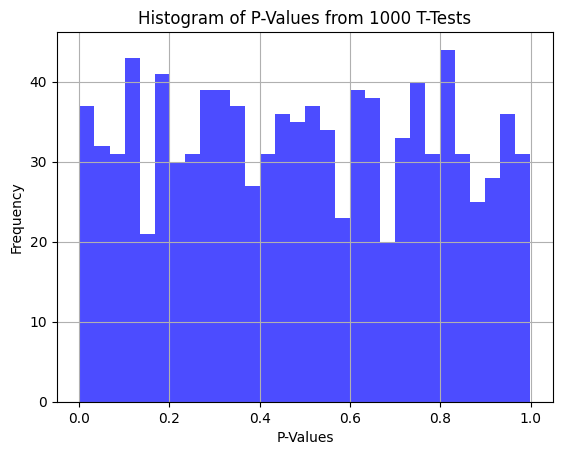

In [12]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Number of simulations
num_simulations = 1000

# Number of samples in each group
sample_size = 100

# Initialize an array to store p-values
p_values = np.zeros(num_simulations)

# Simulate t-tests and store p-values
for i in range(num_simulations):
    # Generate two random samples with equal means and standard deviations
    sample1 = np.random.normal(0, 1, sample_size)  # Sample 1 (mean=0, std=1)
    sample2 = np.random.normal(0, 1, sample_size)  # Sample 2 (mean=0, std=1)

    # Perform a two-sample t-test
    t_stat, p_val = stats.ttest_ind(sample1, sample2)

    # Store the p-value
    p_values[i] = p_val

# Plot a histogram of the p-values
plt.hist(p_values, bins=30, color='blue', alpha=0.7)
plt.xlabel('P-Values')
plt.ylabel('Frequency')
plt.title('Histogram of P-Values from 1000 T-Tests')
plt.grid(True)
plt.show()

# Step 2: Second, once you have the simulated p-values, apply both methods to address the multiple comparisons problem.

Number of rejections (Bonferroni): 0
Actual Type I Error Rate (Bonferroni): 0.0000
Number of rejections (Benjamini-Hochberg): 0
Actual Type I Error Rate (Benjamini-Hochberg): 0.0000


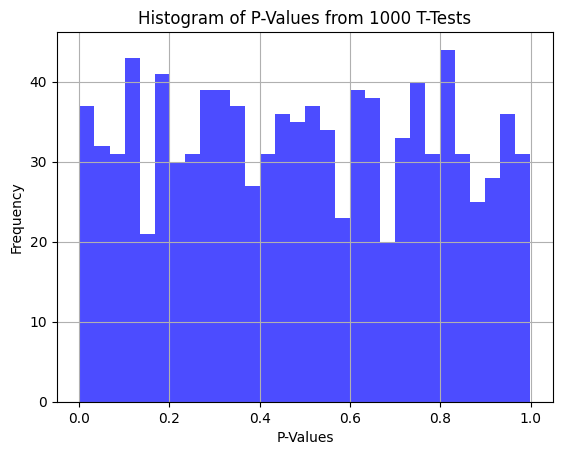

In [13]:
import numpy as np
from scipy import stats
from statsmodels.stats import multitest
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Number of simulations
num_simulations = 1000

# Number of samples in each group
sample_size = 100

# Initialize an array to store p-values
p_values = np.zeros(num_simulations)

# Simulate t-tests and store p-values
for i in range(num_simulations):
    # Generate two random samples with equal means and standard deviations
    sample1 = np.random.normal(0, 1, sample_size)  # Sample 1 (mean=0, std=1)
    sample2 = np.random.normal(0, 1, sample_size)  # Sample 2 (mean=0, std=1)

    # Perform a two-sample t-test
    t_stat, p_val = stats.ttest_ind(sample1, sample2)

    # Store the p-value
    p_values[i] = p_val

# Bonferroni correction
alpha = 0.05
num_tests = len(p_values)
bonferroni_alpha = alpha / num_tests
bonferroni_rejected = p_values < bonferroni_alpha

# Benjamini-Hochberg correction
reject_bh, _, _, _ = multitest.multipletests(p_values, alpha=alpha, method='fdr_bh')

# Count the number of rejected null hypotheses for each correction method
num_rejected_bonferroni = np.sum(bonferroni_rejected)
num_rejected_bh = np.sum(reject_bh)

# Calculate the actual Type I error rate for both methods
actual_error_rate_bonferroni = num_rejected_bonferroni / num_tests
actual_error_rate_bh = num_rejected_bh / num_tests

print(f"Number of rejections (Bonferroni): {num_rejected_bonferroni}")
print(f"Actual Type I Error Rate (Bonferroni): {actual_error_rate_bonferroni:.4f}")

print(f"Number of rejections (Benjamini-Hochberg): {num_rejected_bh}")
print(f"Actual Type I Error Rate (Benjamini-Hochberg): {actual_error_rate_bh:.4f}")

# Plot a histogram of the p-values
plt.hist(p_values, bins=30, color='blue', alpha=0.7)
plt.xlabel('P-Values')
plt.ylabel('Frequency')
plt.title('Histogram of P-Values from 1000 T-Tests')
plt.grid(True)
plt.show()

# Step 3: Third, set the sample 1 and sample 2 means to be 1 and 2 respectively, and re-run the exercise. What do you notice? What if you make the difference between means even greater?

Number of rejections (Bonferroni): 998
Actual Type I Error Rate (Bonferroni): 0.9980
Number of rejections (Benjamini-Hochberg): 1000
Actual Type I Error Rate (Benjamini-Hochberg): 1.0000


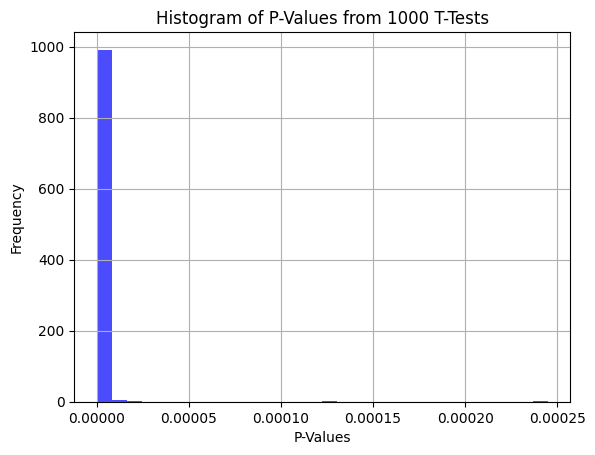

In [14]:
import numpy as np
from scipy import stats
from statsmodels.stats import multitest
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Number of simulations
num_simulations = 1000

# Number of samples in each group
sample_size = 100

# Initialize an array to store p-values
p_values = np.zeros(num_simulations)

# Simulate t-tests and store p-values
for i in range(num_simulations):
    # Generate two random samples with means 1 and 2, both with std=1
    sample1 = np.random.normal(1, 1, sample_size)  # Sample 1 (mean=1, std=1)
    sample2 = np.random.normal(2, 1, sample_size)  # Sample 2 (mean=2, std=1)

    # Perform a two-sample t-test
    t_stat, p_val = stats.ttest_ind(sample1, sample2)

    # Store the p-value
    p_values[i] = p_val

# Bonferroni correction
alpha = 0.05
num_tests = len(p_values)
bonferroni_alpha = alpha / num_tests
bonferroni_rejected = p_values < bonferroni_alpha

# Benjamini-Hochberg correction
reject_bh, _, _, _ = multitest.multipletests(p_values, alpha=alpha, method='fdr_bh')

# Count the number of rejected null hypotheses for each correction method
num_rejected_bonferroni = np.sum(bonferroni_rejected)
num_rejected_bh = np.sum(reject_bh)

# Calculate the actual Type I error rate for both methods
actual_error_rate_bonferroni = num_rejected_bonferroni / num_tests
actual_error_rate_bh = num_rejected_bh / num_tests

print(f"Number of rejections (Bonferroni): {num_rejected_bonferroni}")
print(f"Actual Type I Error Rate (Bonferroni): {actual_error_rate_bonferroni:.4f}")

print(f"Number of rejections (Benjamini-Hochberg): {num_rejected_bh}")
print(f"Actual Type I Error Rate (Benjamini-Hochberg): {actual_error_rate_bh:.4f}")

# Plot a histogram of the p-values
plt.hist(p_values, bins=30, color='blue', alpha=0.7)
plt.xlabel('P-Values')
plt.ylabel('Frequency')
plt.title('Histogram of P-Values from 1000 T-Tests')
plt.grid(True)
plt.show()

The number of rejections of the null hypothesis and error rates increase while p-values decrease because the difference in means has increased. If we were to increase the difference in means to 10, the number of null hypothesis rejections and error rates increase further.

Number of rejections (Bonferroni): 1000
Actual Type I Error Rate (Bonferroni): 1.0000
Number of rejections (Benjamini-Hochberg): 1000
Actual Type I Error Rate (Benjamini-Hochberg): 1.0000


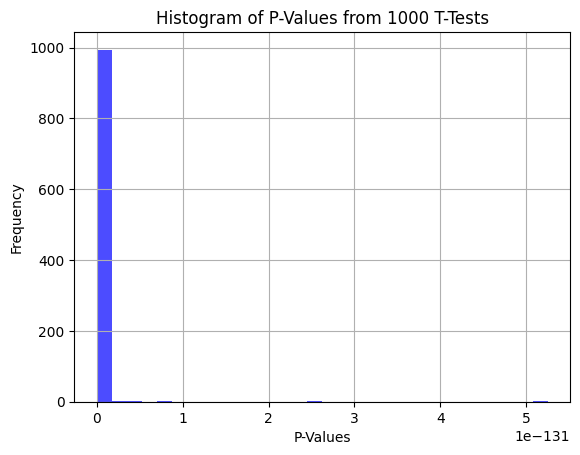

In [9]:
import numpy as np
from scipy import stats
from statsmodels.stats import multitest
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Number of simulations
num_simulations = 1000

# Number of samples in each group
sample_size = 100

# Initialize an array to store p-values
p_values = np.zeros(num_simulations)

# Simulate t-tests and store p-values
for i in range(num_simulations):
    # Generate two random samples with means 1 and 11, both with std=1
    sample1 = np.random.normal(1, 1, sample_size)  # Sample 1 (mean=1, std=1)
    sample2 = np.random.normal(11, 1, sample_size)  # Sample 2 (mean=11, std=1)

    # Perform a two-sample t-test
    t_stat, p_val = stats.ttest_ind(sample1, sample2)

    # Store the p-value
    p_values[i] = p_val

# Bonferroni correction
alpha = 0.05
num_tests = len(p_values)
bonferroni_alpha = alpha / num_tests
bonferroni_rejected = p_values < bonferroni_alpha

# Benjamini-Hochberg correction
reject_bh, _, _, _ = multitest.multipletests(p_values, alpha=alpha, method='fdr_bh')

# Count the number of rejected null hypotheses for each correction method
num_rejected_bonferroni = np.sum(bonferroni_rejected)
num_rejected_bh = np.sum(reject_bh)

# Calculate the actual Type I error rate for both methods
actual_error_rate_bonferroni = num_rejected_bonferroni / num_tests
actual_error_rate_bh = num_rejected_bh / num_tests

print(f"Number of rejections (Bonferroni): {num_rejected_bonferroni}")
print(f"Actual Type I Error Rate (Bonferroni): {actual_error_rate_bonferroni:.4f}")

print(f"Number of rejections (Benjamini-Hochberg): {num_rejected_bh}")
print(f"Actual Type I Error Rate (Benjamini-Hochberg): {actual_error_rate_bh:.4f}")

# Plot a histogram of the p-values
plt.hist(p_values, bins=30, color='blue', alpha=0.7)
plt.xlabel('P-Values')
plt.ylabel('Frequency')
plt.title('Histogram of P-Values from 1000 T-Tests')
plt.grid(True)
plt.show()

# Additional Resources


How to correct for multiple comparisons in [Matlab](https://www.mathworks.com/help/stats/multcompare.html), [R](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/p.adjust.html), and [Python](https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html)

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania